In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pickle

# Dyn pred data

In [2]:
def plot_dyn_predictions(xp_vel_only, xp_lin, xp_alpaca_mean, xp_alpaca_std, xp_alpnom_mean, xp_alpnom_std, xp_alportho_mean, xp_alportho_std, ax1, show_legend = True):
    dt = 0.1
    N_sim_steps = 50

    times = dt*np.arange(N_sim_steps)
    ax1.plot(times, xp_vel_only[1:,:] - xp_vel_only[1:,:], '--', color = 'black', label ='True')

    ax1.plot(times, xp_lin[1:,:]- xp_vel_only[1:,:], label ='Linear model')

    ax1.plot(times, xp_alpaca_mean[1:,:]- xp_vel_only[1:,:], color = 'C1', label ='P-ALPaCA')
    ax1.fill_between(times, xp_alpaca_mean[1:,0]- xp_vel_only[1:,0] - 1.96*xp_alpaca_std[1:,0], xp_alpaca_mean[1:,0]- xp_vel_only[1:,0] + 1.96*xp_alpaca_std[1:,0], color='C1', alpha=0.2)

    ax1.plot(times, xp_alpnom_mean[1:,0]- xp_vel_only[1:,0], color = 'C3', label ='P-ALPaCA with linear model')
    ax1.fill_between(times, xp_alpnom_mean[1:,0]- xp_vel_only[1:,0] - 1.96*xp_alpnom_std[1:,0], xp_alpnom_mean[1:,0]- xp_vel_only[1:,0] + 1.96*xp_alpnom_std[1:,0], color='C3', alpha=0.2)

    ax1.plot(times, xp_alportho_mean[1:,0]- xp_vel_only[1:,0], color = 'C2', label ='P-ALPaCA with linear model + feature ortho.')
    ax1.fill_between(times, xp_alportho_mean[1:,0]- xp_vel_only[1:,0] - 1.96*xp_alportho_std[1:,0], xp_alportho_mean[1:,0]- xp_vel_only[1:,0] + 1.96*xp_alportho_std[1:,0], color='C2', alpha=0.2)

    ax1.set(title = 'Velocity Prediction Error', ylabel = '[mm/s]')
    if show_legend:
        ax1.legend(loc = 'best')
    else:
        ax1.legend().set_visible(False)
    ax1.set_ylim([-0.8,0.5])
    ax1.grid()

    return ax1


In [3]:
def plot_dyn_predictions_compact(xp_vel_only, xp_lin, xp_alpaca_mean, xp_alpaca_std, xp_alpnom_mean, xp_alpnom_std, xp_alportho_mean, xp_alportho_std, ax1, show_legend = True):
    dt = 0.1
    N_sim_steps = 50

    times = dt*np.arange(N_sim_steps)
    ax1.plot(times, xp_vel_only[1:,:] - xp_vel_only[1:,:],'--', color = 'black',  label ='True')

    ax1.plot(times, xp_lin[1:,:]- xp_vel_only[1:,:], label ='Linear model')

    ax1.plot(times, xp_alpaca_mean[1:,:]- xp_vel_only[1:,:], color = 'C1', label ='P-ALPaCA')
    ax1.fill_between(times, xp_alpaca_mean[1:,0]- xp_vel_only[1:,0] - 1.96*xp_alpaca_std[1:,0], xp_alpaca_mean[1:,0]- xp_vel_only[1:,0] + 1.96*xp_alpaca_std[1:,0], color='C1', alpha=0.2)

    ax1.plot(times, xp_alpnom_mean[1:,0]- xp_vel_only[1:,0], color = 'C3', label ='P-ALPaCA with linear model')
    ax1.fill_between(times, xp_alpnom_mean[1:,0]- xp_vel_only[1:,0] - 1.96*xp_alpnom_std[1:,0], xp_alpnom_mean[1:,0]- xp_vel_only[1:,0] + 1.96*xp_alpnom_std[1:,0], color='C3', alpha=0.2)

    ax1.plot(times, xp_alportho_mean[1:,0]- xp_vel_only[1:,0], color = 'C2', label ='P-ALPaCA with linear model + feature ortho.')
    ax1.fill_between(times, xp_alportho_mean[1:,0]- xp_vel_only[1:,0] - 1.96*xp_alportho_std[1:,0], xp_alportho_mean[1:,0]- xp_vel_only[1:,0] + 1.96*xp_alportho_std[1:,0], color='C2', alpha=0.2)

    ax1.set(xlabel = 'Sim time [s]', ylabel = '[mm/s]')
    if show_legend:
        ax1.legend(loc = 'best')
    else:
        ax1.legend().set_visible(False)
    ax1.set_ylim([-0.5,0.5])
    ax1.grid()

    return ax1


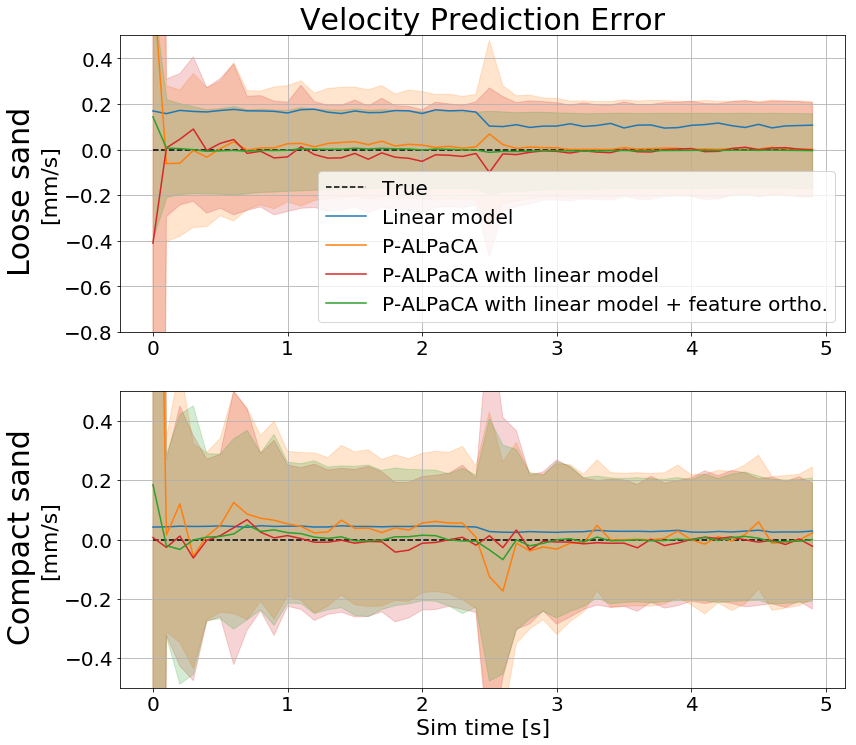

In [38]:


fig = plt.figure(figsize= (13,12))
plt.rcParams.update({'font.size': 20})

plt.rcParams.update({'axes.titlesize': 30})
plt.rcParams.update({'axes.labelsize': 22})

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Load data for loose
filename = './stored_results/results_for_pred_dyn_loose.pickle'
with open(filename, 'rb') as f:
    xp_vel_only, xp_lin, xp_alpaca_mean, xp_alpaca_std, xp_alpnom_mean, xp_alpnom_std, xp_alportho_mean, xp_alportho_std = pickle.load(f)
# Plot data for loose
ax1 = plot_dyn_predictions(xp_vel_only, xp_lin, xp_alpaca_mean, xp_alpaca_std, xp_alpnom_mean, xp_alpnom_std, xp_alportho_mean, xp_alportho_std, ax1)

# Load data for compact
filename = './stored_results/results_for_pred_dyn_compact.pickle'
with open(filename, 'rb') as f:
    xp_vel_only, xp_lin, xp_alpaca_mean, xp_alpaca_std, xp_alpnom_mean, xp_alpnom_std, xp_alportho_mean, xp_alportho_std = pickle.load(f)
# Plot data for compact
ax2 = plot_dyn_predictions_compact(xp_vel_only, xp_lin, xp_alpaca_mean, xp_alpaca_std, xp_alpnom_mean, xp_alpnom_std, xp_alportho_mean, xp_alportho_std, ax2, show_legend = False)

fig.text(0.02, 0.70, 'Loose sand', ha='center', va='center', rotation='vertical', size='30')
fig.text(0.02, 0.30, 'Compact sand', ha='center', va='center', rotation='vertical', size='30')

plt.savefig('./stored_results/pred_dyn_loose_compact.png', dpi = 300)
plt.show()

# Est params data

In [28]:
def plot_estimates_loose(true_params_list, est_params_nom_list, est_params_Iag_list, est_params_alpanom_list, est_var_alpanom_list, est_params_alportho_list, est_var_alportho_list, est_params_fnom_list = None, ax1 = None, ax2 = None, show_legend = True):
    num_sim_steps = est_params_nom_list.shape[0]
    times = 0.1*np.arange(num_sim_steps+1)

    ax1.plot(times[:-1], true_params_list[:,0], '--', color = 'black', label='True')

    ax1.plot(times[:-1], est_params_nom_list[:,0], label ='Linear model')

    ax1.plot(times[:-1], est_params_Iag_list, label ='Iagnemma model')

    ax1.plot(times, 1000*est_params_alpanom_list[:,0], color='C3', label ='P-ALPaCA with linear model')
    ax1.fill_between(times,1000*(est_params_alpanom_list[:,0] - 1.96/np.sqrt(est_var_alpanom_list[:,0,0])), 1000*(est_params_alpanom_list[:,0] + 1.96/np.sqrt(est_var_alpanom_list[:,0,0])),color='C3', alpha=0.25)

    ax1.plot(times, 1000*est_params_alportho_list[:,0],color='C2',  label ='P-ALPaCA with linear model + feature ortho.')
    ax1.fill_between(times,1000*(est_params_alportho_list[:,0] - 1.96/np.sqrt(est_var_alportho_list[:,0,0])), 1000*(est_params_alportho_list[:,0] + 1.96/np.sqrt(est_var_alportho_list[:,0,0])),color='C2',alpha=0.4)
    

    ax1.set(title = 'Cohesion (c)', ylabel = '[Pa]')
    if show_legend:
        ax1.legend(loc = 'best')
    else:
        ax1.legend().set_visible(False)
    ax1.set_ylim((-240,1.75e3))
    ax1.grid()

    ax2.plot(times[:-1], true_params_list[:,1]*180/np.pi,'--', color = 'black', label='True')

    ax2.plot(times[:-1], est_params_nom_list[:,1]*180/np.pi, label ='Linear model')

    ax2.plot(times[:-1], est_params_Iag_list[:,1]*180/np.pi, label ='Iagnemma model')

    ax2.plot(times, est_params_alpanom_list[:,1]*180/np.pi,color='C3', label ='P-ALPaCA with linear model')
    ax2.fill_between(times,180/np.pi*(est_params_alpanom_list[:,1] - 1.96/np.sqrt(est_var_alpanom_list[:,1,1])), 180/np.pi*(est_params_alpanom_list[:,1] + 1.96/np.sqrt(est_var_alpanom_list[:,1,1])),color='C3',alpha=0.25)

    ax2.plot(times, est_params_alportho_list[:,1]*180/np.pi,color='C2', label ='P-ALPaCA with linear model + feature ortho.')
    ax2.fill_between(times,180/np.pi*(est_params_alportho_list[:,1] - 1.96/np.sqrt(est_var_alportho_list[:,1,1])), 180/np.pi*(est_params_alportho_list[:,1] + 1.96/np.sqrt(est_var_alportho_list[:,1,1])),color='C2',alpha=0.4)

    ax2.set(title = 'Angle of internal friction (phi)', ylabel = '[Deg]')
    ax2.legend().set_visible(False)
    ax2.grid() 
    ax2.set_ylim((0,50))

    return ax1, ax2

In [33]:
def plot_estimates_compact(true_params_list, est_params_nom_list, est_params_Iag_list, est_params_alpanom_list, est_var_alpanom_list, est_params_alportho_list, est_var_alportho_list, est_params_fnom_list = None, ax1 = None, ax2 = None, show_legend = True):
    num_sim_steps = est_params_nom_list.shape[0]
    times = 0.1*np.arange(num_sim_steps+1)

    ax1.plot(times[:-1], true_params_list[:,0],'--', color = 'black', label='True')
    
    ax1.plot(times[:-1], est_params_nom_list[:,0], label ='Linear model')

    ax1.plot(times[:-1], est_params_Iag_list[:,0], label ='Iagnemma model')

    ax1.plot(times, 1000*est_params_alpanom_list[:,0], color='C3', label ='P-ALPaCA with linear model')
    ax1.fill_between(times,1000*(est_params_alpanom_list[:,0] - 1.96/np.sqrt(est_var_alpanom_list[:,0,0])), 1000*(est_params_alpanom_list[:,0] + 1.96/np.sqrt(est_var_alpanom_list[:,0,0])),color='C3', alpha=0.25)

    ax1.plot(times, 1000*est_params_alportho_list[:,0],color='C2',  label ='P-ALPaCA with linear model + feature ortho.')
    ax1.fill_between(times,1000*(est_params_alportho_list[:,0] - 1.96/np.sqrt(est_var_alportho_list[:,0,0])), 1000*(est_params_alportho_list[:,0] + 1.96/np.sqrt(est_var_alportho_list[:,0,0])),color='C2',alpha=0.4)
    

    ax1.set(xlabel = 'Sim time [s]', ylabel = '[Pa]')
    # ax1.legend(loc = 'best')
    ax1.set_ylim((0,1.3e3))
    ax1.grid()

    ax2.plot(times[:-1], true_params_list[:,1]*180/np.pi,'--', color = 'black', label='True')

    ax2.plot(times[:-1], est_params_nom_list[:,1]*180/np.pi, label ='Linear model')

    ax2.plot(times[:-1], est_params_Iag_list[:,1]*180/np.pi, label ='Iagnemma model')

    ax2.plot(times, est_params_alpanom_list[:,1]*180/np.pi,color='C3', label ='P-ALPaCA with linear model')
    ax2.fill_between(times,180/np.pi*(est_params_alpanom_list[:,1] - 1.96/np.sqrt(est_var_alpanom_list[:,1,1])), 180/np.pi*(est_params_alpanom_list[:,1] + 1.96/np.sqrt(est_var_alpanom_list[:,1,1])),color='C3',alpha=0.25)

    ax2.plot(times, est_params_alportho_list[:,1]*180/np.pi,color='C2', label ='P-ALPaCA with linear model + feature ortho.')
    ax2.fill_between(times,180/np.pi*(est_params_alportho_list[:,1] - 1.96/np.sqrt(est_var_alportho_list[:,1,1])), 180/np.pi*(est_params_alportho_list[:,1] + 1.96/np.sqrt(est_var_alportho_list[:,1,1])),color='C2',alpha=0.4)

    ax2.set(xlabel = 'Sim time [s]', ylabel = '[Deg]')
    ax2.legend(loc = 'best')
    ax2.grid() 
    ax2.set_ylim((0,90))

    return ax1, ax2

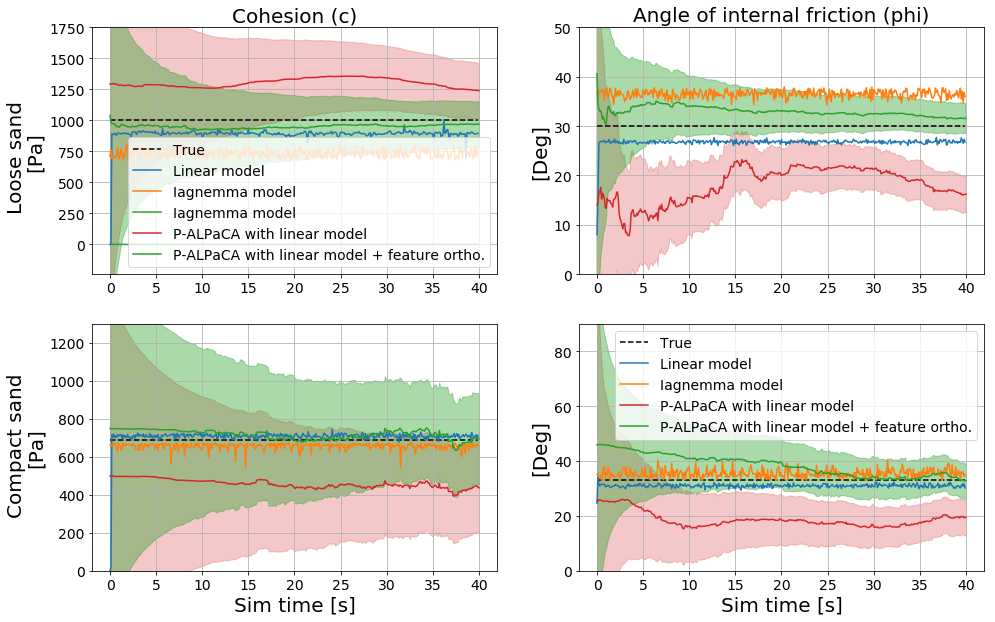

In [36]:
# fig = plt.figure(figsize= plt.figaspect(0.2))
fig = plt.figure(figsize= (16,10))
plt.rcParams.update({'font.size': 14})

plt.rcParams.update({'axes.titlesize': 20})
plt.rcParams.update({'axes.labelsize': 20})

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# Load data for loose
filename = './stored_results/results_for_est_param_loose.pickle'
with open(filename, 'rb') as f:
    true_params_list, est_params_nom_list, est_params_Iag_list, est_params_alpanom_list, est_var_alpanom_list, est_params_alportho_list, est_var_alportho_list, est_params_fnom_list, u_list = pickle.load(f)
# Plot data for loose
ax1, ax2 = plot_estimates_loose(true_params_list, est_params_nom_list, est_params_Iag_list, est_params_alpanom_list, est_var_alpanom_list, est_params_alportho_list, est_var_alportho_list, est_params_fnom_list, ax1, ax2)

# Load data for compact
filename = './stored_results/results_for_est_param_compact.pickle'
with open(filename, 'rb') as f:
    true_params_list, est_params_nom_list, est_params_Iag_list, est_params_alpanom_list, est_var_alpanom_list, est_params_alportho_list, est_var_alportho_list, est_params_fnom_list, u_list = pickle.load(f)
# Plot data for compact
ax3, ax4 = plot_estimates_compact(true_params_list, est_params_nom_list, est_params_Iag_list, est_params_alpanom_list, est_var_alpanom_list, est_params_alportho_list, est_var_alportho_list, est_params_fnom_list, ax3, ax4, show_legend = False)

fig.text(0.06, 0.70, 'Loose sand', ha='center', va='center', rotation='vertical', size='20')
fig.text(0.06, 0.30, 'Compact sand', ha='center', va='center', rotation='vertical', size='20')

plt.savefig('./stored_results/terr_params_quad.png', dpi = 300)
plt.show()